# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('dados_nascimento.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
dados_extras_ro = pd.read_csv('dados_extras_ro.csv',sep=";",encoding="latin_1")

dados_extras_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [7]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [9]:
latitude = pd.cut(sinasc_raw['munResLat'], [-13.5,-10.5,-8.7])

In [10]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=latitude,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                              \
               desvio padrão mediana máximo      média mínimo  variancia   
munResLat                                                                  
(-13.5, -10.5]      6.320385    26.0     53  26.178943     12  39.947272   
(-10.5, -8.7]       6.447663    25.0     52  26.014964     11  41.572355   

                    IDADEPAI                                              
               desvio padrão mediana máximo      média mínimo  variancia  
munResLat                                                                 
(-13.5, -10.5]      7.707002    30.0   86.0  30.903145   15.0  59.397875  
(-10.5, -8.7]       8.034214    31.0   73.0  32.126689   16.0  64.548602

In [11]:
sinasc_raw.groupby(latitude)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                            ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                    \
                mediana mínimo  variancia desvio padrão      média máximo   
munResLat                                                                   
(-13.5, -10.5]     26.0     12  39.947272      6.320385  26.178943     53   
(-10.5, -8.7]      25.0     11  41.572355      6.447663  26.014964     52   

               IDADEPAI                                                    
                mediana mínimo  variancia desvio padrão      média máximo  
munResLat                                                                  
(-13.5, -10.5]     30.0   15.0  59.397875      7.707002  30.903145   86.0  
(-10.5, -8.7]      31.0   16.0  64.548602      8.034214  32.126689   73.0

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [13]:
area = pd.cut(sinasc_raw['munResArea'], [459,3000,34100])

In [14]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=area,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                              \
              desvio padrão mediana máximo      média mínimo  variancia   
munResArea                                                                
(459, 3000]        6.305535    26.0     53  26.324775     11  39.759775   
(3000, 34100]      6.405497    25.0     53  26.038518     12  41.030387   

                   IDADEPAI                                              
              desvio padrão mediana máximo      média mínimo  variancia  
munResArea                                                               
(459, 3000]        7.675474    30.0   69.0  31.092792   16.0  58.912900  
(3000, 34100]      7.818364    30.0   86.0  31.094014   15.0  61.126809

In [15]:
sinasc_raw.groupby(area)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                            ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                    \
               mediana mínimo  variancia desvio padrão      média máximo   
munResArea                                                                 
(459, 3000]       26.0     11  39.759775      6.305535  26.324775     53   
(3000, 34100]     25.0     12  41.030387      6.405497  26.038518     53   

              IDADEPAI                                                    
               mediana mínimo  variancia desvio padrão      média máximo  
munResArea                                                                
(459, 3000]       30.0   16.0  58.912900      7.675474  31.092792   69.0  
(3000, 34100]     30.0   15.0  61.126809      7.818364  31.094014   86.0

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [17]:
 altitude = pd.qcut(sinasc_raw['munResAlt'], 3)

In [18]:
sinasc_raw.pivot_table(values=["IDADEMAE","IDADEPAI"],
                    index=altitude,
                    aggfunc={("média","mean"),("mínimo","min"),("máximo","max"),
                             ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                              \
                desvio padrão mediana máximo      média mínimo  variancia   
munResAlt                                                                   
(84.999, 111.0]      6.539797    26.0     47  26.228763     12  42.768945   
(111.0, 177.0]       6.331844    25.0     52  25.923889     11  40.092250   
(177.0, 595.0]       6.276696    26.0     53  26.146631     13  39.396917   

                     IDADEPAI                                              
                desvio padrão mediana máximo      média mínimo  variancia  
munResAlt                                                                  
(84.999, 111.0]      7.994731    32.0   73.0  32.387870   16.0  63.915728  
(111.0, 177.0]       7.815858    30.0   66.0  31.150891   15.0  61.087636  
(177.0, 595.0]       7.676821    30.0   86.0  30.825483   16.0  58.933583

In [19]:
sinasc_raw.groupby(altitude)[["IDADEMAE","IDADEPAI"]].agg({("média","mean"),("mínimo","min"),("máximo","max"),
                                                           ("mediana","median"),("desvio padrão","std"),("variancia","var")})

IDADEMAE                                                    \
                 mediana mínimo  variancia desvio padrão      média máximo   
munResAlt                                                                    
(84.999, 111.0]     26.0     12  42.768945      6.539797  26.228763     47   
(111.0, 177.0]      25.0     11  40.092250      6.331844  25.923889     52   
(177.0, 595.0]      26.0     13  39.396917      6.276696  26.146631     53   

                IDADEPAI                                                    
                 mediana mínimo  variancia desvio padrão      média máximo  
munResAlt                                                                   
(84.999, 111.0]     32.0   16.0  63.915728      7.994731  32.387870   73.0  
(111.0, 177.0]      30.0   15.0  61.087636      7.815858  31.150891   66.0  
(177.0, 595.0]      30.0   16.0  58.933583      7.676821  30.825483   86.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [20]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

Text(0, 0.5, 'Idade da Mãe')

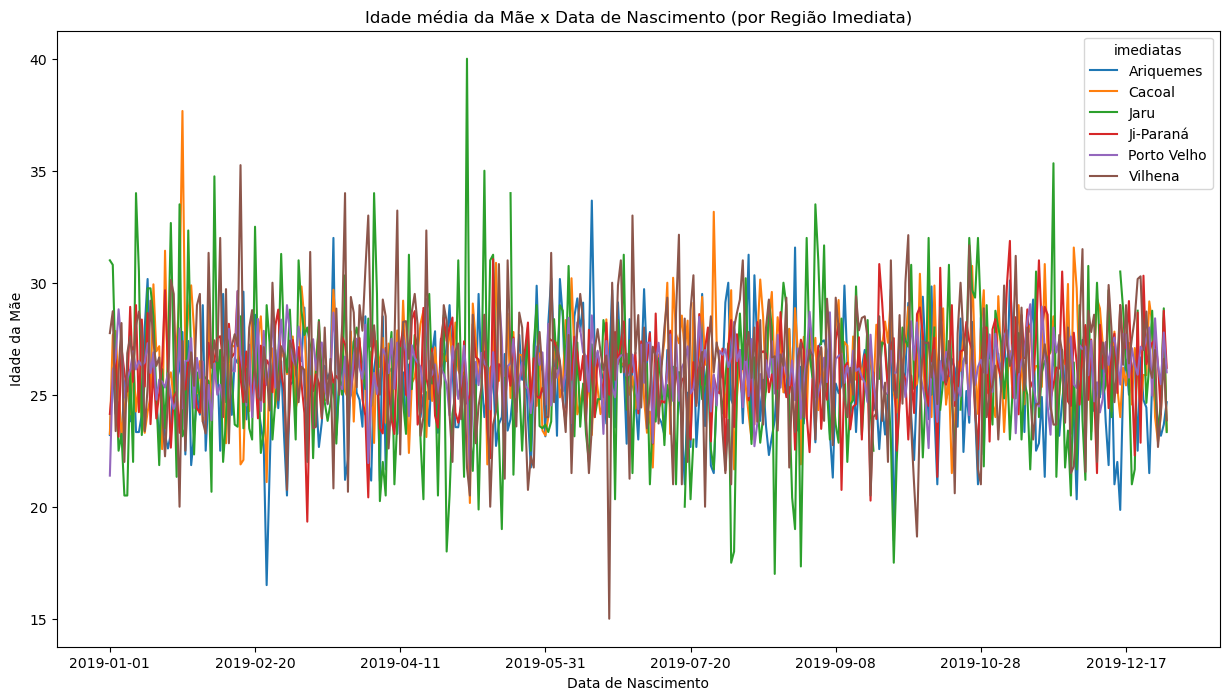

In [36]:
SIN_IMED = sinasc_raw.copy()

SIN_IMED['imediatas'] = SIN_IMED['munResNome'].map(imediatas)

SIN_IMED_grafico = SIN_IMED.groupby(['DTNASC', 'imediatas'])['IDADEMAE'].mean().unstack()

SIN_IMED_grafico.plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento (por Região Imediata)")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')


Text(0, 0.5, 'Idade da Mãe')

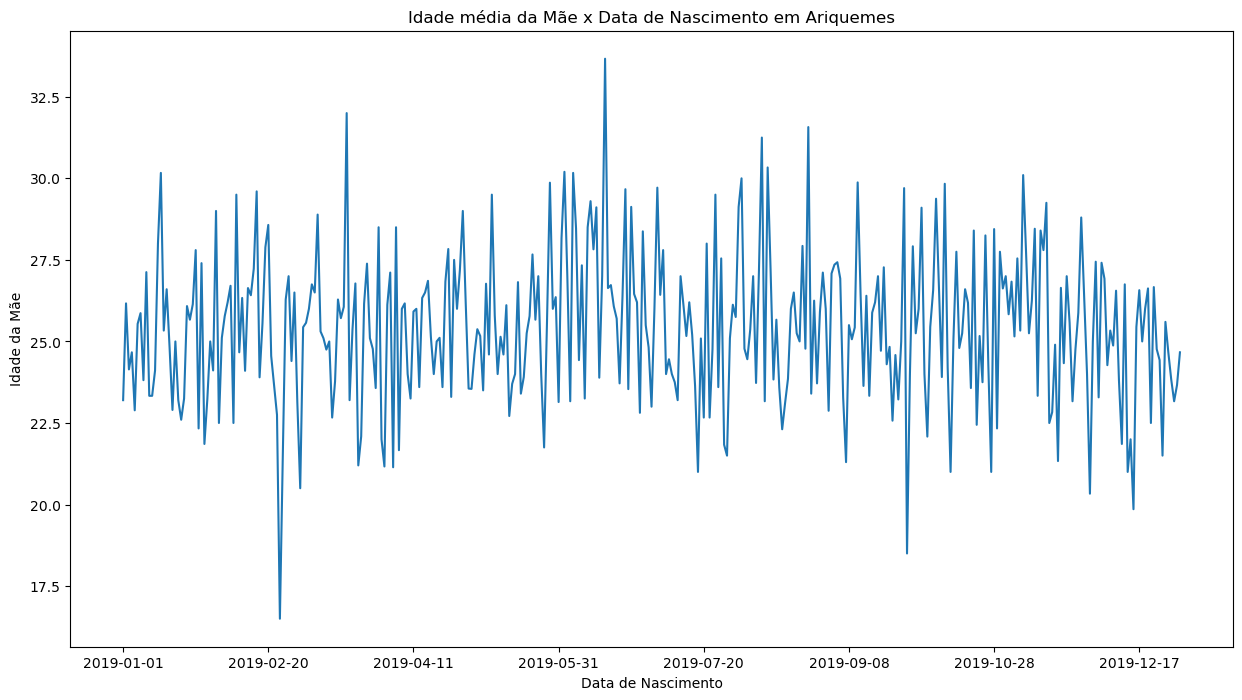

In [40]:
SIN_IMED_grafico["Ariquemes"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Ariquemes")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

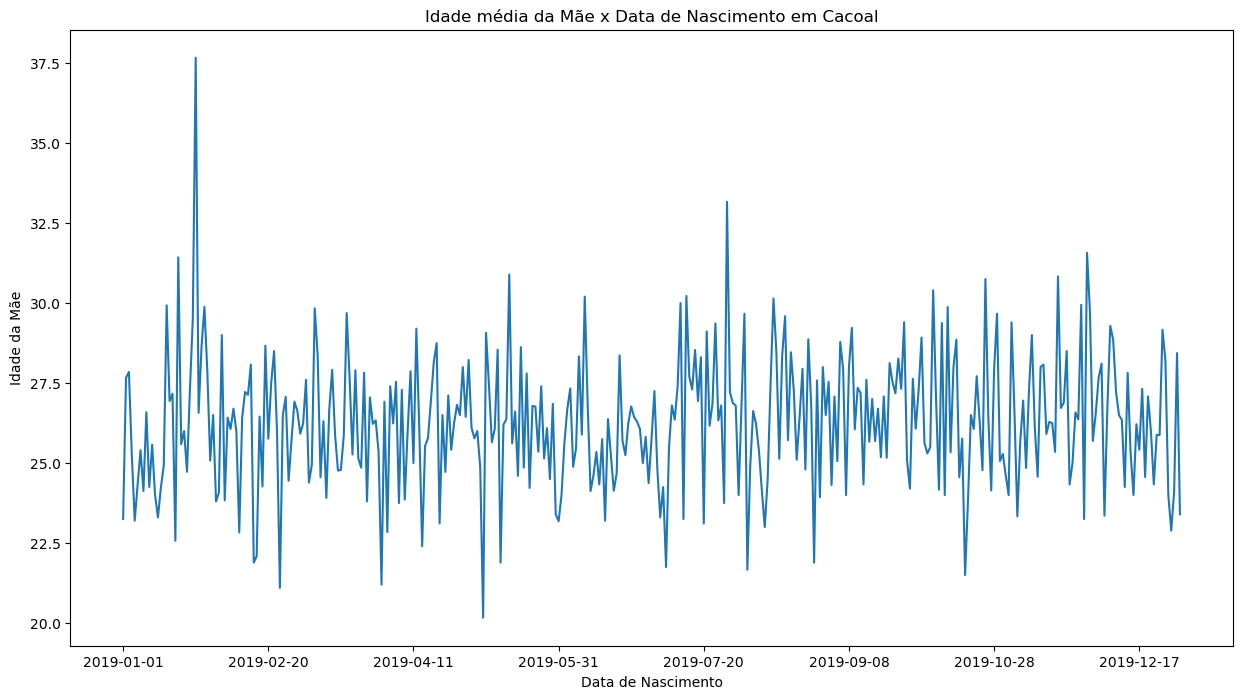

In [41]:
SIN_IMED_grafico["Cacoal"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Cacoal")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

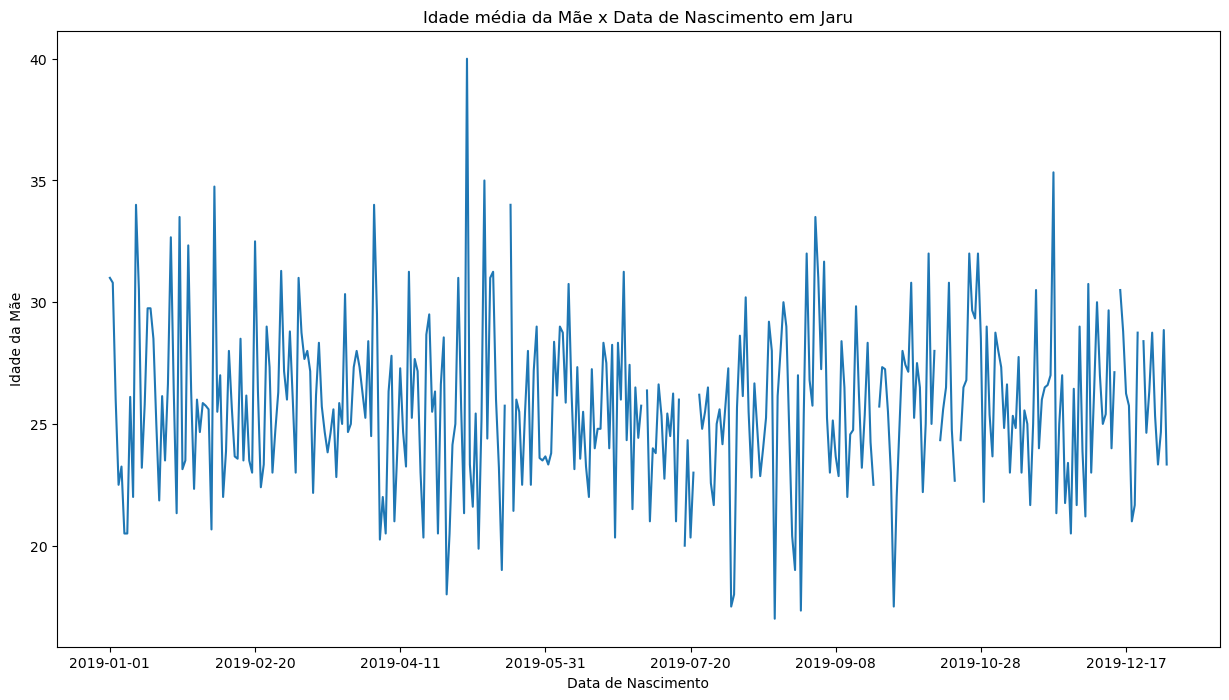

In [42]:
SIN_IMED_grafico["Jaru"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Jaru")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

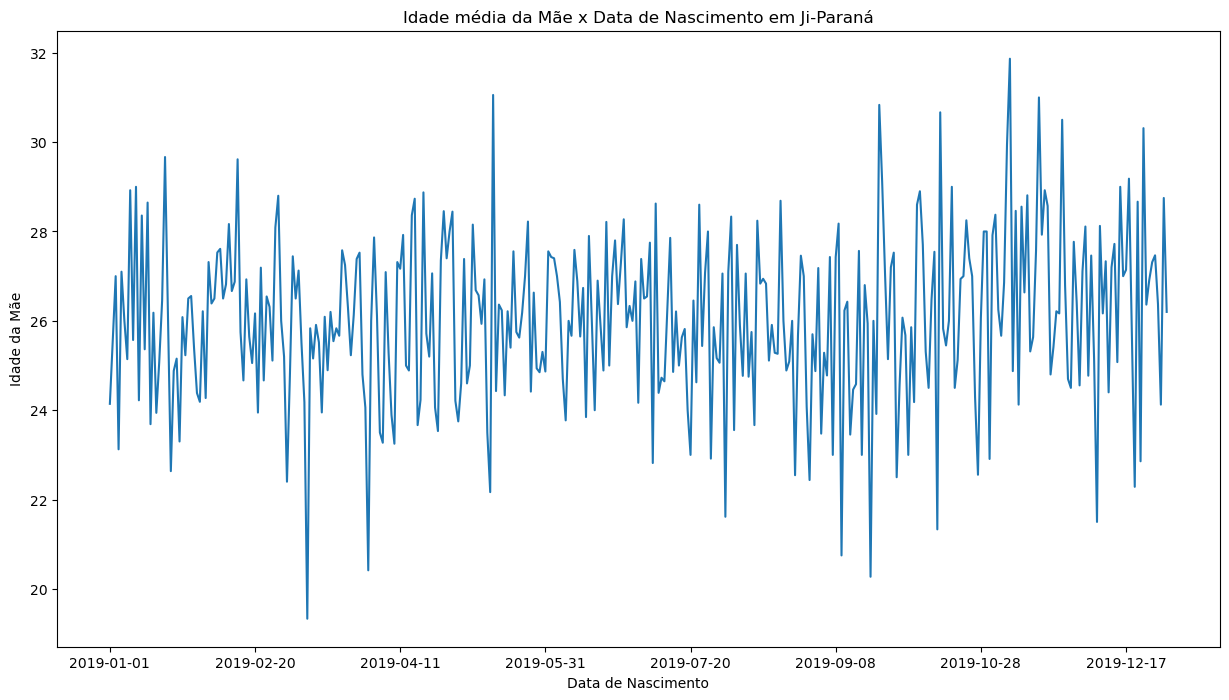

In [43]:
SIN_IMED_grafico["Ji-Paraná"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Ji-Paraná")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

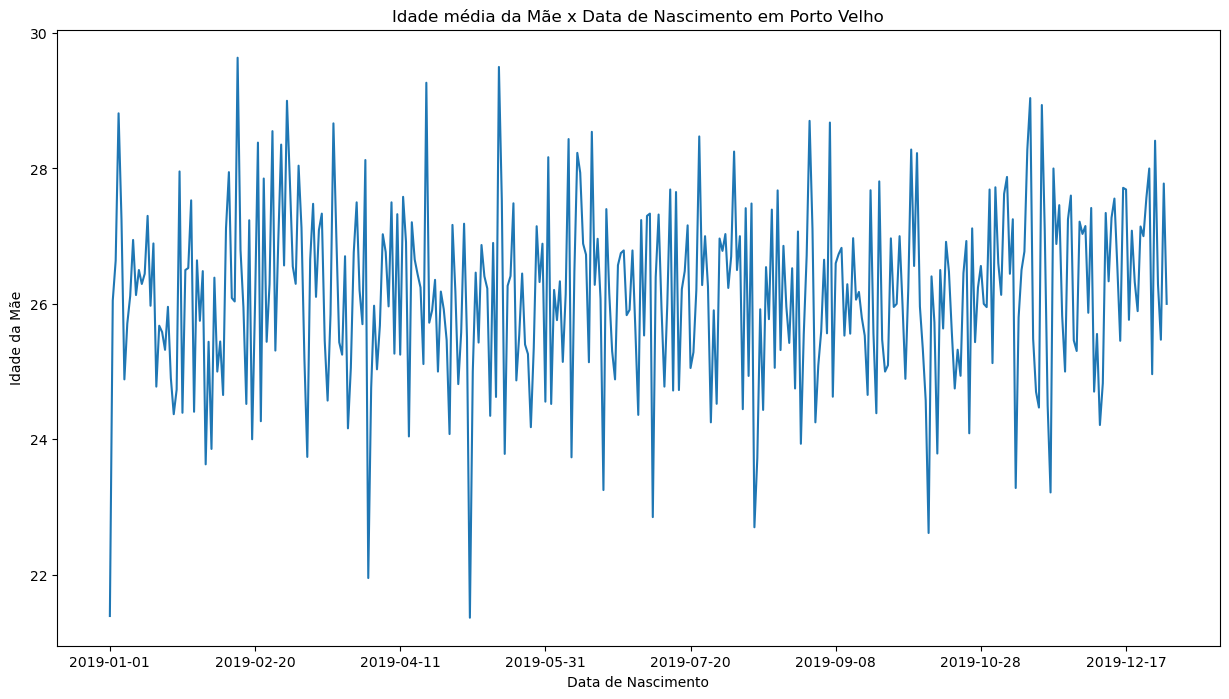

In [44]:
SIN_IMED_grafico["Porto Velho"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Porto Velho")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

Text(0, 0.5, 'Idade da Mãe')

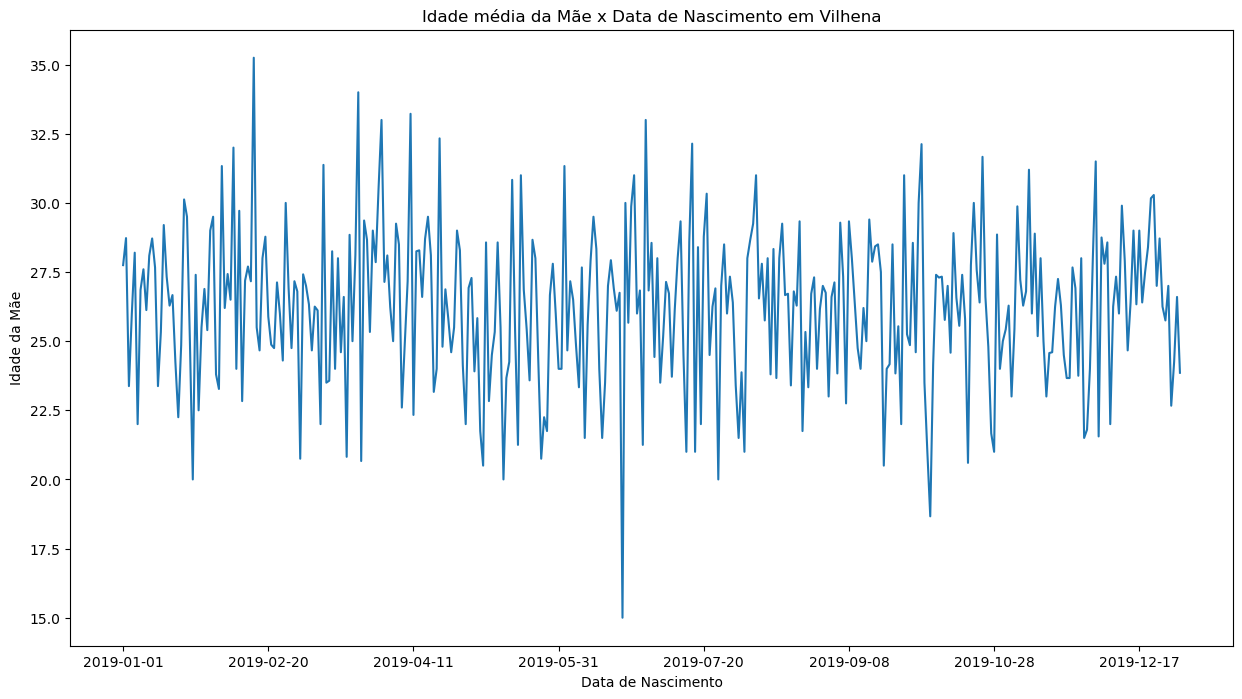

In [45]:
SIN_IMED_grafico["Vilhena"].plot(figsize=(15,8))
plt.title("Idade média da Mãe x Data de Nascimento em Vilhena")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [ ]:
IDH = {
"Porto Velho":0.736
"Vilhena":0.731
"Cacoal":0.718
"Ji-Paraná":0.714
"Pimenta Bueno":0.710
"Ariquemes":0.702
"Rolim de Moura":0.700
"Cerejeiras":0.692
"Jaru":0.689
"Colorado do Oeste":0.685
"Ouro Preto do Oeste":0.682
"Espigão d'Oeste":0.672
"Santa Luzia d'Oeste":0.670
"Pimenteiras do Oeste":0.665
"Presidente Médici":0.664
"Castanheiras":0.658
"Guajará-Mirim":0.657
"Chupinguaia":0.652
"Cabixi":0.650
"Candeias do Jamari":0.649
"São Felipe d'Oeste":0.649
"Cacaulândia":0.646
"São Miguel do Guaporé":0.646
"Mirante da Serra":0.643
"Alvorada d'Oeste":0.643
"Teixeirópolis":0.643
"Nova Brasilândia d'Oeste":0.643
"Rio Crespo":0.643
"Primavera de Rondônia":0.641
"Alta Floresta d'Oeste":0.641
"Ministro Andreazza":0.638
"Novo Horizonte do Oeste":0.634
"Vale do Paraíso":0.627
"Alto Paraíso":0.625
"Parecis":0.617
"Buritis":0.616
"Itapuã do Oeste":0.614
"Corumbiara":0.613
"Cujubim":0.612
"Costa Marques":0.611
"São Francisco do Guaporé":0.611
"Urupá":0.609
"Monte Negro":0.607
"Seringueiras":0.598
"Governador Jorge Teixeira":0.596
"Machadinho d'Oeste":0.596
"Campo Novo de Rondônia":0.593
"Alto Alegre dos Parecis":0.592
"Theobroma":0.589
"Nova União":0.587
"Nova Mamoré":0.587
"Vale do Anari":0.584


}

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
IFDM = {
"Ariquemes":0.7746
"Vilhena":0.7465
"Pimenta Bueno":0.7383
"Porto Velho":0.7257
"Ji-Paraná":0.7117
"Cacoal":0.7111
"Santa Luzia d'Oeste":0.6850
"Rolim de Moura":0.6785
"Chupinguaia":0.6766
"São Miguel do Guaporé":0.6699
"Pimenteiras do Oeste":0.6501
"Teixeirópolis":0.6500
"Colorado do Oeste":0.6473
"Jaru":0.6450
"Rio Crespo":0.6430
"Primavera de Rondônia":0.6384
"Alta Floresta d'Oeste":0.6337
"Ouro Preto do Oeste":0.6261
"São Francisco do Guaporé":0.6214
"Candeias do Jamari":0.6199
"Buritis":0.6199
"São Felipe d'Oeste":0.6153
"Presidente Médici":0.6140
"Cerejeiras":0.6137
"Monte Negro":0.6016
"Urupá":0.6006
"Espigão d'Oeste":0.5973
"Seringueiras":0.5922
"Alvorada d'Oeste":0.5919
"Itapuã do Oeste":0.5903
"Cabixi":0.5887
"Novo Horizonte do Oeste":0.5858
"Nova Brasilândia d'Oeste":0.5857
"Vale do Paraíso":0.5818
"Corumbiara":0.5759
"Alto Paraíso":0.5735
"Cacaulândia":0.5721
"Vale do Anari":0.5710
"Ministro Andreazza":0.5657
"Costa Marques":0.5626
"Nova União":0.5571
"Guajará-Mirim":0.5541
"Mirante da Serra":0.5519
"Parecis":0.5502
"Castanheiras":0.5430
"Theobroma":0.5405
"Machadinho d'Oeste":0.5322
"Campo Novo de Rondônia":0.5272
"Nova Mamoré":0.5084
"Cujubim":0.5055
"Alto Alegre dos Parecis":0.5046
"Governador Jorge Teixeira":0.4562
}


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [ ]:
PIB={
"Porto Velho":17912070
"Ji-Paraná":3783972
"Vilhena":2831175
"Ariquemes":2579830
"Cacoal":2261644
"Jaru":1500890
"Rolim de Moura":1283434
"Pimenta Bueno":1164877
"Guajará-Mirim":893000
"Ouro Preto do Oeste":834000
"Buritis":726000
"Machadinho do Oeste":633000
"Espigãod'Oeste":625000
"São Miguel do Guaporé":616000
"Candeias do Jamari":548000
"Nova Mamoré":529000
"Cerejeiras":507000
"Alta Florestado Oeste":496000
"Presidente Médici":428000
"Cujubim":385000
"Nova Brasilândia do Oeste":360000
"Alto Paraíso":358000
"São Francisco do Guaporé":353000
"Colorado do Oeste":335000
"Monte Negro":219152
"Alto Alegre dos Parecis":213410
"Campo Novo de Rondônia":208821
"Alvorada do Oeste":204098
"Chupinguaia":190331
"Corumbiara":188218
"Ministro Andreazza":174633
"Urupá":172143
"Costa Marques":171878
"Seringueiras":169429
"Mirante da Serra":163955
"Governador Jorge Teixeira":148027
"Theobroma":140601
"Santa Luzia do Oeste":135934
"Novo Horizonte do Oeste":129399
"Itapuã do Oeste":129351
"Vale do Paraíso":116742
"Cacaulândia":116635
"Cabixi":113031
"Valedo Anari":105208
"Nova União":92346
"Parecis":80759
"Rio Crespo":76854
"Pimenteiras do Oeste":76756
"Teixeirópolis":72089
"São Felipe do Oeste":72084
"Castanheiras":59779
"Primavera de Rondônia":52908

}

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

descobri que teve uma data em que a media da idade das maes era menor que 18 anos em Ariquemes e chegou a ser 15 em Vilhena